# this is to check what generator() in `icdar.py` does! 
# also modify it fast to use full size image

In [1]:
from icdar import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import cv2

# from chainercv.visualizations import vis_bbox
# from chainercv.visualizations import vis_image
# from chainercv.utils import read_image

# from geo_map_cython_lib import gen_geo_map

# the fullsize

- 2016 x 1344

In [2]:
im_fn = "../data/east_char_train/shiso19340020_img_0059_1_0060_2.jpg"
im = cv2.imread(im_fn)
h, w, _ = im.shape#so this is still a full size
txt_fn = im_fn.replace(os.path.basename(im_fn).split('.')[1], 'txt')
text_polys, text_tags = load_annoataion(txt_fn)
text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))

start_time = time.time()
score_map, geo_map, training_mask = generate_rbox((h, w), text_polys, text_tags)
elapsed_time = time.time() - start_time
print(elapsed_time)

102.15859317779541


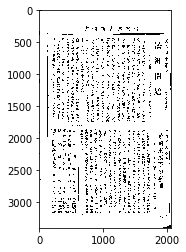

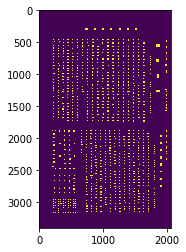

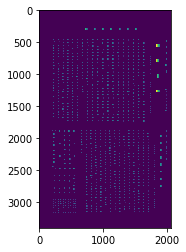

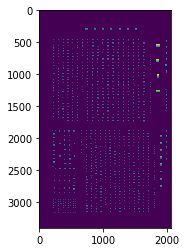

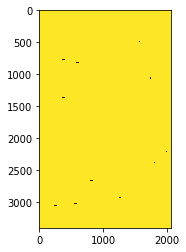

In [3]:
plt.imshow(im)
plt.show()
plt.imshow(score_map)
plt.show()
plt.imshow(geo_map[::, ::, 1])
plt.show()
plt.imshow(geo_map[::, ::, 2])
plt.show()
plt.imshow(training_mask)
plt.show()

In [4]:
im_fn = "../data/east_char_train/shiso19340020_img_0059_1_0060_2.jpg"
im = cv2.imread(im_fn)
h, w, _ = im.shape#so this is still a full size
txt_fn = im_fn.replace(os.path.basename(im_fn).split('.')[1], 'txt')
text_polys, text_tags = load_annoataion(txt_fn)
text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))

start_time = time.time()
score_map_, geo_map_, training_mask_ = generate_rbox_fast((h, w), text_polys, text_tags)
elapsed_time = time.time() - start_time
print(elapsed_time)

4.484727382659912


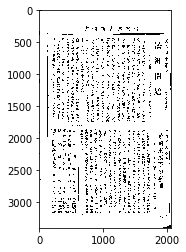

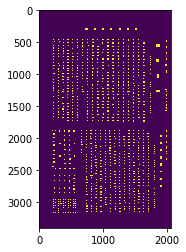

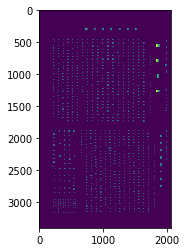

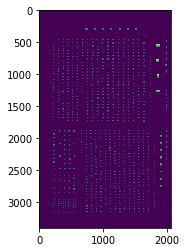

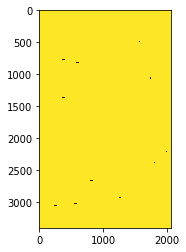

In [5]:
plt.imshow(im)
plt.show()
plt.imshow(score_map_)
plt.show()
plt.imshow(geo_map_[::, ::, 1])
plt.show()
plt.imshow(geo_map_[::, ::, 2])
plt.show()
plt.imshow(training_mask_)
plt.show()

In [6]:
np.array_equal(score_map_,score_map)

True

In [7]:
np.array_equal(training_mask_,training_mask)

True

In [8]:
np.max(geo_map_)

82.00004

In [9]:
np.mean(geo_map_)

0.9075699

In [10]:
np.mean(geo_map)

0.9075703

In [13]:
np.prod(np.isclose(geo_map_,geo_map,rtol=0.0001))

1

# crop case (develop later)

In [12]:
# im = im_ori
# # crop background
# input_size = 512
# im, text_polys, text_tags = crop_area(im, text_polys, text_tags, crop_background=True)
# # pad and resize image
# new_h, new_w, _ = im.shape
# max_h_w_i = np.max([new_h, new_w, input_size])
# im_padded = np.zeros((max_h_w_i, max_h_w_i, 3), dtype=np.uint8)
# im_padded[:new_h, :new_w, :] = im.copy()
# im = cv2.resize(im_padded, dsize=(input_size, input_size))
# score_map = np.zeros((input_size, input_size), dtype=np.uint8)
# geo_map_channels = 5 
# geo_map = np.zeros((input_size, input_size, geo_map_channels), dtype=np.float32)
# training_mask = np.ones((input_size, input_size), dtype=np.uint8)

# plt.imshow(im)